In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Plot settings
# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = sns.color_palette("rocket", 12)
suptitle_fontsize = 14
title_fontsize = 13
axis_fontsize = 10
label_fontsize = 10
legend_fontsize = 10

df = pd.read_csv("wine-missing.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

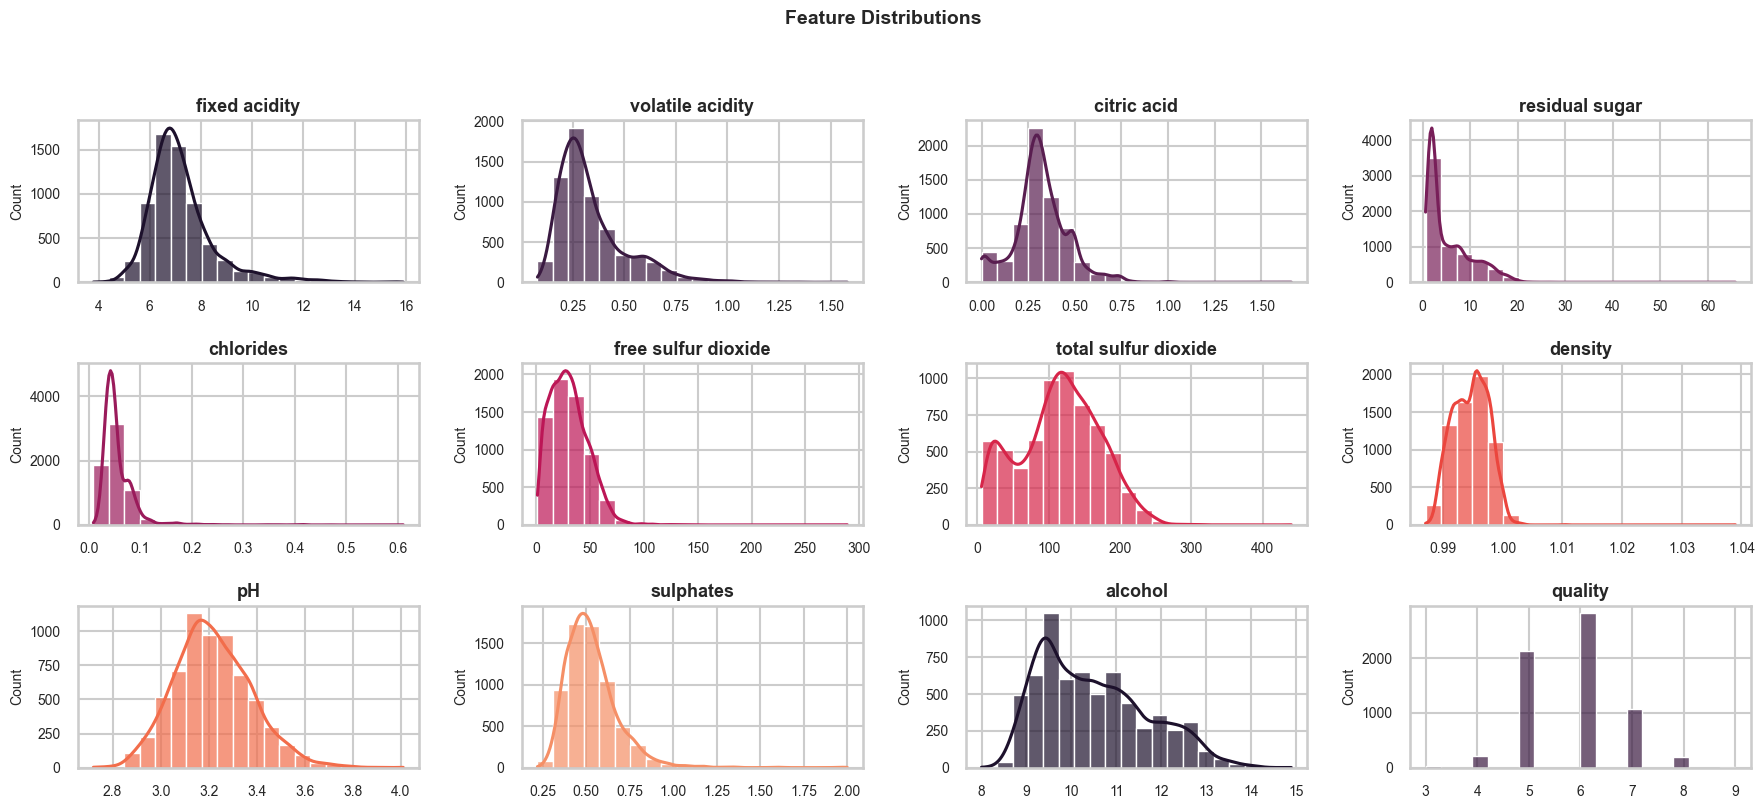

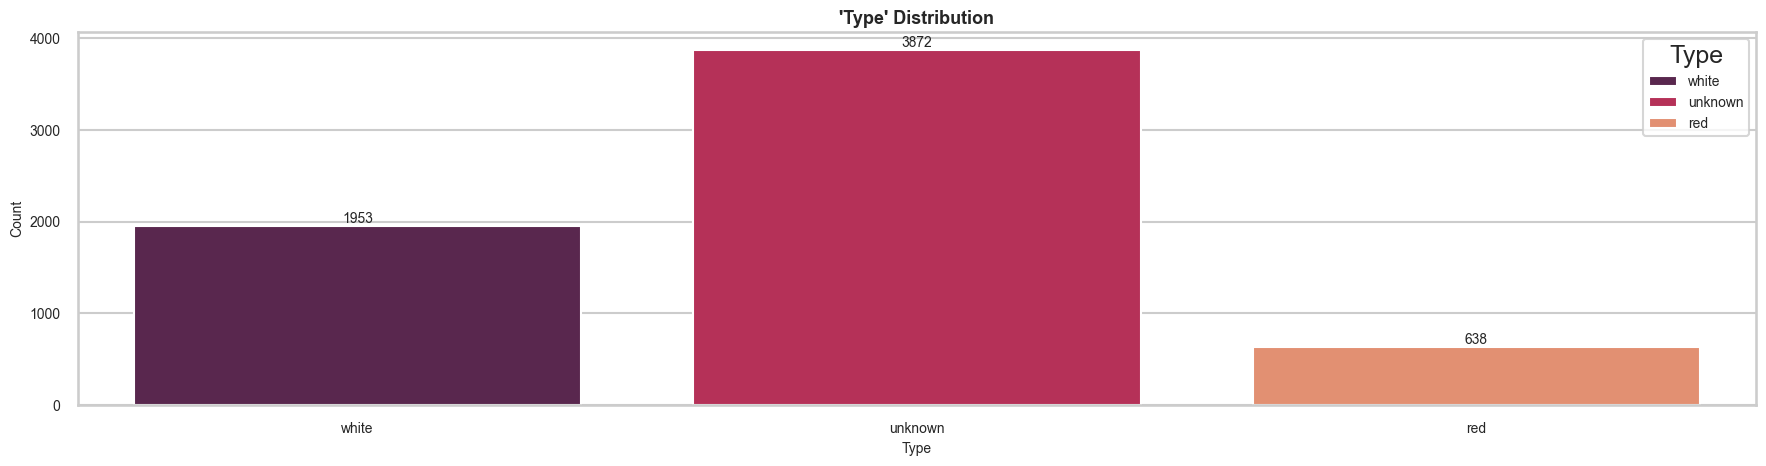

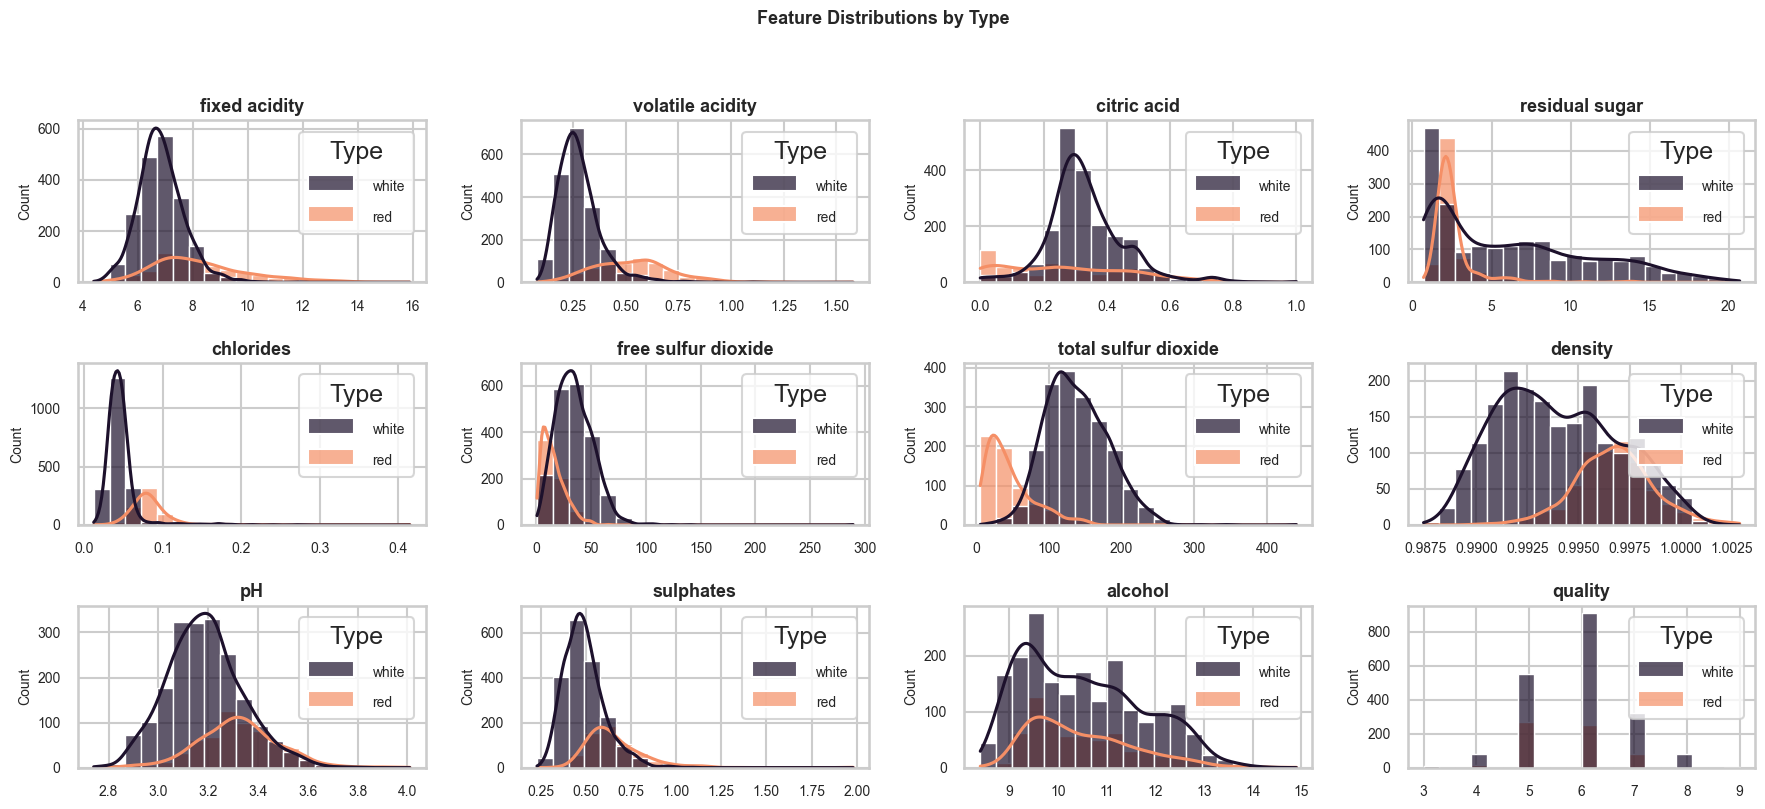

In [5]:
# Features histograms
fig, axes = plt.subplots(3, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate([col for col in df.columns if col != "type"]):
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=col != "quality",
        color=palette[i % 10],
        ax=axes[i],
        alpha=0.7,
    )
    axes[i].set_title(col, fontsize=title_fontsize, weight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=label_fontsize)
    axes[i].tick_params(axis="both", which="major", labelsize=label_fontsize)

fig.suptitle("Feature Distributions", fontsize=suptitle_fontsize, weight="bold", y=1.02)
plt.tight_layout()
plt.show()

# Target Type barplot
plt.figure(figsize=(18, 5))
sns.countplot(data=df, x="type", palette="rocket", hue="type")
plt.title("'Type' Distribution", fontsize=title_fontsize, weight="bold")
plt.xlabel("Type", fontsize=label_fontsize)
plt.ylabel("Count", fontsize=label_fontsize)
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%d", label_type="edge", fontsize=label_fontsize)
plt.xticks(fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)

# Legend
plt.legend(title="Type", labels=df["type"].unique(), fontsize=label_fontsize)
plt.tight_layout()
plt.show()

# Define colors for types
types = ["white", "red"]

# Features histograms by type
fig, axes = plt.subplots(3, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate([c for c in df.columns if c != "type"]):
    sns.histplot(
        data=df[df["type"].isin(types)],  # filter for selected types
        x=col,
        bins=20,
        hue="type",
        palette=[palette[0], palette[9]],
        multiple="layer",
        kde=col != "quality",
        ax=axes[i],
        alpha=0.7,
    )
    axes[i].set_title(col, fontsize=title_fontsize, weight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=label_fontsize)
    axes[i].tick_params(axis="both", which="major", labelsize=label_fontsize)

    # Adjust legend fontsize if it exists
    leg = axes[i].get_legend()
    if leg is not None:
        leg.set_title("Type")
        for text in leg.get_texts():
            text.set_fontsize(legend_fontsize)

fig.suptitle(
    "Feature Distributions by Type", fontsize=title_fontsize, weight="bold", y=1.02
)
plt.tight_layout()
plt.show()

### Question 1
We can make the following observations:
- We have a total of **6497** entries with some **NA** values included. After droppping any NA value we have **6463** total lines.
- Regarding the `Type` target feature, we see that more than **50%** of the dataset is unknown. That limits us from being able to follow a classic supervised learning approach.
- Except for the `unknown` types, we also see that we have a class imbalance with `whites` being the dominant class value.
- Regarding the other features, we observe skewness in most of the features. Since we are talking about lab measurements, the extremely big values could come from bad measurements or faulty sensors.
- We observe that our dataset consits mostly of medium `quality` wines, since most of our quality values are centered around **6**.
- Finally, from the histograms per-type, we can see some features that show different distribution according to the wine type like `chlorides`, `total sulfur dioxide`, `volatile acidity` and `citric acid`.

In [6]:
# Map categorical to numerical values
type_mapping = {"white": 0, "red": 1, "unknown": 2}
df["type"] = df["type"].map(type_mapping)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split to known/unknown
y_col = "type"
x_cols = [x for x in df.columns if x != y_col]
known_idx = df[df["type"] != 2].index
unknown_idx = df[df["type"] == 2].index

x_known = df.loc[known_idx][x_cols].to_numpy()
y_known = df.loc[known_idx][y_col].to_numpy()

x_unknown = df.loc[unknown_idx][x_cols].to_numpy()
y_unknown = df.loc[unknown_idx][y_col].to_numpy()

# Split to train/test set
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, random_state=42, stratify=y_known
)

model = RandomForestClassifier(random_state=42).fit(x_train, y_train)
y_test_pred = model.predict(x_test)
# Compute accuracy
acc = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
fscore = f1_score(y_test, y_test_pred)

print(f"acc: {acc}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"fscore: {fscore}")

acc: 0.9974293059125964
recall: 0.9895833333333334
precision: 1.0
fscore: 0.9947643979057592


### Question 5
Since our dataset is imbalanced, relying on **accuracy** can be **misleading**. A classifier that always predicts the majority class could achieve high accuracy while performing poorly overall.

In such cases, the **F1-score**, which is the harmonic mean of **precision** and **recall**, is a more reliable metric to evaluate model performance.

In [8]:
import numpy as np

iteration = 0
threshold = 0.65
while len(x_unknown) > 0:
    model = RandomForestClassifier(random_state=42, class_weight="balanced").fit(
        x_train, y_train
    )
    y_test_pred = model.predict(x_test)
    # Compute accuracy
    acc = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    fscore = f1_score(y_test, y_test_pred)

    y_unknown_proba = model.predict_proba(x_unknown)

    whites = np.where(y_unknown_proba[:, 0] > threshold)[0]
    reds = np.where(y_unknown_proba[:, 1] > threshold)[0]
    y_unknown[whites] = 0
    y_unknown[reds] = 1

    x_train = np.concatenate((x_train, x_unknown[whites]), axis=0)
    x_train = np.concatenate((x_train, x_unknown[reds]), axis=0)
    y_train = np.concatenate((y_train, y_unknown[whites]), axis=0)
    y_train = np.concatenate((y_train, y_unknown[reds]), axis=0)

    to_delete_idx = np.concatenate((reds, whites), axis=0)
    x_unknown = np.delete(x_unknown, to_delete_idx, axis=0)
    y_unknown = np.delete(y_unknown, to_delete_idx, axis=0)

    print(
        f"Iteration {iteration}: unkown_labels={len(x_unknown)} | acc={acc} | recall={recall} | precision={precision} | fscore={fscore}"
    )
    iteration += 1
    if iteration >= 10:
        threshold = 0.6
    if iteration >= 15:
        break

print("Unclassified samples remain:", len(x_unknown))

Iteration 0: unkown_labels=49 | acc=0.9987146529562982 | recall=0.9947916666666666 | precision=1.0 | fscore=0.9973890339425587
Iteration 1: unkown_labels=29 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.9947643979057592
Iteration 2: unkown_labels=26 | acc=0.9961439588688946 | recall=0.984375 | precision=1.0 | fscore=0.9921259842519685
Iteration 3: unkown_labels=25 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.9947643979057592
Iteration 4: unkown_labels=25 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.9947643979057592
Iteration 5: unkown_labels=25 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.9947643979057592
Iteration 6: unkown_labels=25 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.9947643979057592
Iteration 7: unkown_labels=25 | acc=0.9974293059125964 | recall=0.9895833333333334 | precision=1.0 | fscore=0.99476439790

### Question 6
Based on the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier:~:text=The%20%E2%80%9Cbalanced%E2%80%9D%20mode%20uses%20the%20values%20of%20y%20to%20automatically%20adjust%20weights%20inversely%20proportional%20to%20class%20frequencies%20in%20the%20input%20data%20as%20n_samples%20/%20(n_classes%20*%20np.bincount(y))), with **class_weight="balanced"** the model will add weights that are inversely proportional to class frequencies. In this way, we can make the model pay more attention to the class with less records in the training dataset.

In both approaches we see very good values in the metrics. That could be because up to now we have only trained the classifier with red/white instances and with none of the unknown instances.

### Questions 8-10
In the block above we have implemented a while loop that assigns labels to unkown labels per iteration. The loop does the following:
- Trains a random forest classifier on x_train
- Calculates the probabilities for each row in the x_unknown array
- Assigns a label based on a probability threshold
- Moves the rows that have taken a label to x_train and deletes them from x_unkown
- The proccedure continues until there are no records in the unknown arrays or breaks at 15 iterations